# <center> Cumulative Sum algorithm </center>

## Mathematical background

The CUSUM (Cumulative Sum) algorithm introduced by <a href="https://www.jstor.org/stable/2333009">Page (1954)</a> requires knowledge of the pre-change and post-change distributions of the data stream for optimality as shown by <a href="https://www.jstor.org/stable/2241476">Moustakides (1986)</a>. Assume that the stream is initially $\mathcal{N}(\mu, \sigma^2)$ distributed, let $S_j$ and $T_j$ be the algorithm statistics defined as $S_0 = T_0 = 0$ and
$$
\begin{aligned}
S_j &= \max (0, S_{j-1} + \frac{x_j - \mu}{\sigma} - k), \\
T_j &= \max (0, T_{j-1} - \frac{x_j - \mu}{\sigma} - k),
\end{aligned}
$$
for $j \in \{ 1, 2, ...\}$.

Note that both $\mu$ and $\sigma$ can be updated sequentially and efficiently, without having to store all previous observations $x_j$, using 
$$
\begin{aligned}
\mu_n &= \frac{n-1}{n} \mu_{n-1} + \frac{1}{n} x_n, \\
\sigma_n^2 &= \frac{n-2}{n-1} \sigma_{n-1}^2 + \frac{(x_n - \mu_n) (x_{n-1} - \mu_{n-1})}{n-1}.
\end{aligned}
$$

A change can then be detected if $S_j > h$ or $T_j > h$. Note that $k$ and $h$ are control parameters which need to be chosen according to the application.

## CUSUM in `ocpdet`

Install `ocpdet` package by running the command line: `pip install ocpdet` and import CUSUM as

In [1]:
from ocpdet import CUSUM

First, let's generate some artificial data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

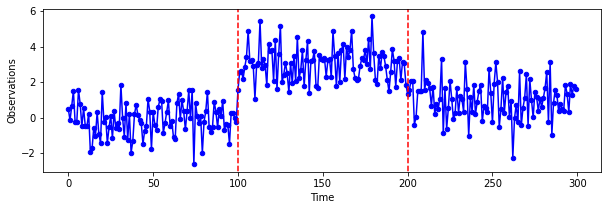

In [3]:
np.random.seed(42)

data = np.concatenate([
    np.random.normal(loc=0., scale=1., size=(100,)),
    np.random.normal(loc=3., scale=1., size=(100,)),
    np.random.normal(loc=1., scale=1., size=(100,)),
])

plt.figure(figsize=(10, 3))
plt.scatter(range(0, len(data)), data, c="b", s=20)
plt.plot(range(0, len(data)), data, c="b")
plt.xlabel("Time")
plt.ylabel("Observations")
plt.axvline(100, min(data), max(data), color="r", linestyle="--")
plt.axvline(200, min(data), max(data), color="r", linestyle="--")
plt.show()

CUSUM is implemented as a `Class` in `ocpdet` and it can be initialised such as

In [4]:
model = CUSUM(k=1., h=2., burnin=50, mu=0., sigma=1.)

We can now process this data stream using the CUSUM object `model` that we created.

In [5]:
model.process(data)

We can now retrieve detected changepoints using the `changepoints` attribute of the `model` object.

In [6]:
model.changepoints

[101, 204]

This isn't too bad as true changepoints occurred at times $t=100$ and $t=200$. The `CUSUM` object also brings flexibility and access to the algorithm statistics $S$ and $T$ defined previously, using the `S` and `T` attributes of the object.

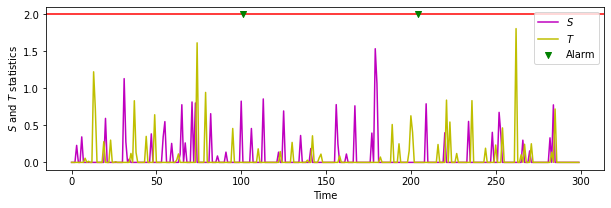

In [7]:
plt.figure(figsize=(10, 3))
plt.plot(range(0, len(data)), model.S, c="m", label="$S$")
plt.plot(range(0, len(data)), model.T, c="y", label="$T$")
plt.axhline(model.h, color="r", linestyle="-", zorder=-10)
plt.scatter(model.changepoints, len(model.changepoints) * [model.h], marker="v",
            label="Alarm", color="green")
plt.xlabel("Time")
plt.ylabel("$S$ and $T$ statistics")
plt.legend()
plt.show()